In [1]:
# what model am i selecting
# why am i selecting the model
# evaluate the results
# use test data
# possibly try another model
# end with conclusion

# Introduction/Project Overview:
In this notebook, I will present my solution and analysis of the Titanic dataset. This is a very famous dataset that can be found on [kaggle](https://www.kaggle.com/c/titanic/data). The dataset contains demographics of the Titanc passengers, incluiding who survived and who did not. The goal is to build a model that can correctly classify new examples (check who will survive or not). Throughout this notebook I will visualize the data, explain some data preprocessing techniques, construct and evaluate models and analyze the results. 

#### Data Exploration & Preprocessing:  
I will conduct a comprehensive exploration of the dataset, analyzing its various features, checking for missing values, and gaining insights into the distribution of variables. Prior to building the models, I will preprocess the data by handling missing values, encoding categorical variables, and scaling numerical features to ensure optimal model performance.

#### Model Building & Evaluation:
In this notebook I will try implement several models to try and correctly classify passengers who survied. This is a supervised learning task as we are given the labels of who survived and who did not. For this project the models I have chosen are logistic regression, decision trees, random forests, support vector machines and neural networks. For each of these modules I will evalute their peformance using f1score, confusion matrices, and overall accuracy. 

#### Conclusion: 
Finally, I will interpret the results of the models, identifying significant factors that contribute to passenger survival prediction and discussing potential areas for model improvement. The Titanic dataset is a good challange to test your knowledege on machine learning. This will serve as a good test for me to keep learning and testing my skills.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Exploration
As mentioned earlier I got the dataset from kaggle. The link to that can be found above. The download came with two csv files. One for the training set and one for the test set. Since I have it locally on my computer I can eassily access the data as shown below. Some of the first steps we will do before creating a model is to see what our data looks like.

In [3]:
# read train and test sets
train = pd.read_csv('./train.csv') 
test = pd.read_csv('./test.csv') 

We loaded in the data into pandas dataframes and now we want to see what our data looks like. What does vairables does it contain and what data types, etc. First lets start by getting its size. 

In [4]:
len(train) # get size of train data

891

As we can see it is a somewhat large dataset. This will be good for our model to have many samples to learn from. Additionally its not too large where we would require lots of compute power and time for training. Moving on from this we can check what columns we have in our dataset

In [5]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
train.info() # get info on our train 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The tables above tell us a couple of things. For starters we have see that we have 12 columns which are PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked. Lets breakdown each of them and see what might be useful for training our model. 

PassengderId: This column might not be vary useful as it is simply a id assigned by the dataset. We will drop this column before training. 

Survived: This column is our labels and is important since this is a supervised machine learning problem. If we wanted to go with a clustering/unsupervised learning we could drop this. For the purpose of the notebook we will be keeping this. 

Pclass: On kaggle it says that this columns serves "A proxy for socio-economic status". Where 1 is upper, 2 is middle and 3 is upper. This will be important for our model

Name: This is simply the name of the passenger. This could be important as some family last names could mean that they are from a wealthier family and therfore might have a higher chance of surviving. For this notebook we will most likely drop it. 

Sex/Age: The sex of the passenger. Since women and children were  prioritized in the case of an emergency this would helpful to determined who would survive. 

SibSp: In the kaggle description of the dataset it says that sibsp is "# of siblings / spouses aboard the Titanic". This could be helpful. 

Parch: In the kaggle description of the dataset it says that parch is "# of parents / children aboard the Titanic". This will also be helpful. 

Ticket: Simply the ticket ID so we can remove this.

Fare: How much they paid for their ticket. This can be useful as maybe workers did not pay for ticket and upper class people payed for their tickets. We will keep this column. 

Cabin: This is the cabin they were staying at. This could be useful but there are several missing values in this column so for now we will ignore it. 

Embarked: The Location of where they embarked. This could be important to determine who survived. For examples people who embarked at a certain location might be workers and others might be upper class familiies. This could be useful. 

In [7]:
# drop the columns PassengerId, Name, Ticket, Cabin
train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [8]:
# get info on the remaining dataframe
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Our dataframe now only contains the columns that we want. However from the table above we can see that we still have quite a few missing values in a couple of columns. For example `Age` has quite a few missing values. `Embarked` has some missing values but nothing major. We now have to figure out what to do with the missing values for age. Lets first check how many missing values we have exactly. 

In [9]:
# count missing values in columns
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

We have a total of 177 missing values. We have a couple of options on what to do for the missing values. We can either drop the rows of the missing values. In the case of embarked we probably will becuase it is two rows. For the case of age however we might want to try to fill the missing values because we would loose a lot of data if we dropped those rows. 

I will be doing both approaches. One where we drop the rows that have missing values and one where we fill in the missing values. At the end we will see if there is really a difference and if it was worth filling in the missing values. First lets go look into our missing values to decide what approach we will take. 

In [100]:
# get the rows that have missing values and create dataframe
missing_vals_df = train[train.isna().any(axis=1)]

In [101]:
# show the first 15 samples in the dataframe of missing values
missing_vals_df.head(15) 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
29,0,3,male,NaN,0,0,7.8958,S
31,1,1,female,NaN,1,0,146.5208,C
32,1,3,female,NaN,0,0,7.7500,Q
36,1,3,male,NaN,0,0,7.2292,C
42,0,3,male,NaN,0,0,7.8958,C


From the table above we can see that from the first 15 samples most of the Pclass are 3. Lets count how many of the missing values are of Pclass 3. 

In [102]:
# in missing values count the pclass frequencies
missing_vals_df['Pclass'].value_counts()

Pclass
3    136
1     32
2     11
Name: count, dtype: int64

In [104]:
missing_vals_df['Survived'].value_counts()

Survived
0    125
1     54
Name: count, dtype: int64

In [ ]:
missing_vals_df['Parch'].value_counts()

In [44]:
# from the dataframe containg missing age values get a frequency count on the fare
missing_vals['Fare'].value_counts()

Fare
7.7500     20
7.8958     15
8.0500     14
0.0000      8
69.5500     7
           ..
82.1708     1
7.7292      1
6.8583      1
8.1125      1
9.5000      1
Name: count, Length: 74, dtype: int64

A lot of the missing values are from the Pclass 3. We are going to see if we can get more info as to why the age on some of these is unkown. Once we can make a guess we will then see if we can fill the values in. 

In [64]:
def get_pclass(df, n):
    """
    seperate non age null dataframes into dataframes by their pclass (1,2,3)
    """
    dataframes = []
    for i in range(1,n+1):
        not_null = df[df['Age'].notnull()]
        not_null_filtered = not_null[not_null['Pclass'] == i]
        dataframes.append(not_null_filtered)
    return dataframes

In [ ]:
pclass_df = get_pclass(train, 3)

In [68]:
pclass_df.append(train[train['Age'].notnull()])

In [95]:
pclass_df[1]['Age']

9      14.0
15     55.0
20     35.0
21     34.0
33     66.0
       ... 
866    27.0
874    28.0
880    25.0
883    28.0
886    27.0
Name: Age, Length: 173, dtype: float64

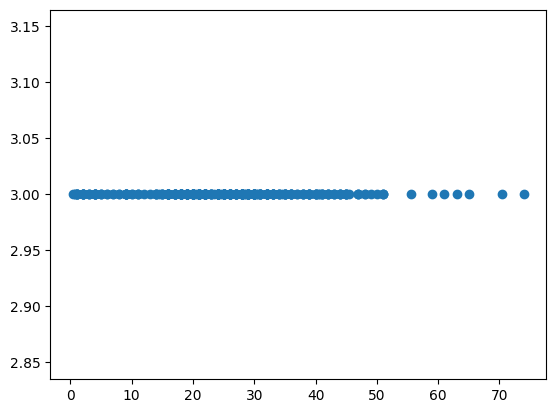

In [98]:
plt.scatter(pclass_df[2]['Age'], pclass_df[2]['Pclass'])
plt.show()